## 가위바위보 분류기 제작
### 순서
1. 이미지 크기 조절
2. load_data() 함수 이용해 학습용 데이터 생성
3. 딥러닝 네트워크 설계
4. 딥러닝 네트워크 학습시키기
5. 테스트

### 1. 이미지 크기 조절

In [233]:
# 이미지 크기 조절을 위해 PIL import

from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [234]:
# 이미지 크기 조절을 위한 함수

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")


In [235]:
# 가위 이미지 크기 조정
image_dir_scissor = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_scissor)

print("가위 이미지 resize 완료!")

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!


In [236]:
# 바위 이미지 크기 조정
image_dir_rock = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_rock)
print("바위 이미지 resize 완료!")

500  images to be resized.
500  images resized.
바위 이미지 resize 완료!


In [237]:
# 보 이미지 크기 조정
image_dir_paper = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_paper)
print("보 이미지 resize 완료!")

500  images to be resized.
500  images resized.
보 이미지 resize 완료!


### 2. load_data() 함수 이용해 학습용 데이터 생성

In [238]:
# 폴더 위치를 넘겨 받아 가위, 바위, 보를 각각 0, 1, 2로 라벨링 해주는 함수
def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [239]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 1500 입니다.
x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


라벨:  0


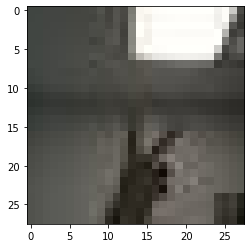

In [240]:
# 이미지 확인
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

### 3. 딥러닝 네트워크 설계하기

In [241]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_41 (Dense)             

### 4. 딥러닝 네트워크 학습시키기

In [242]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
47/47 [==============================] - 0s 3ms/step - loss: 1.0820 - accuracy: 0.3993
Epoch 2/15
47/47 [==============================] - 0s 3ms/step - loss: 0.9879 - accuracy: 0.4773
Epoch 3/15
47/47 [==============================] - 0s 3ms/step - loss: 0.8592 - accuracy: 0.5827
Epoch 4/15
47/47 [==============================] - 0s 4ms/step - loss: 0.7235 - accuracy: 0.7013
Epoch 5/15
47/47 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.7427
Epoch 6/15
47/47 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.8280
Epoch 7/15
47/47 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.8167
Epoch 8/15
47/47 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8627
Epoch 9/15
47/47 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.8880
Epoch 10/15
47/47 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.9073
Epoch 11/15
47/47 [

### 5. 테스트

In [243]:
# test 용 데이터 생성
image_dir_s_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_s_test)

image_dir_r_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_r_test)

image_dir_p_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_p_test)

image_dir_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_test, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
데이터의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [244]:
# test accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.6312 - accuracy: 0.6233
test_loss: 2.6311638355255127 
test_accuracy: 0.6233333349227905


### 결과 정리

1. 처음 주어진 300개의 데이터로만 학습했을 때는 test accuracy가 대략 33%
2. 네트워크 설계 단계에서 하이퍼파라미터를 변경해봤지만 성능이 크게 향상되지 않음
3. 데이터의 수를 1500으로 늘리고 epoch를 10으로 설정한 후 시도 했을 때 대략 90퍼센트 내외의 정확도가 나옴.
4. 데이터 수를 1500으로 고정한 뒤 학습을 시킬 때 epochs를 15으로 조정해 테스트를 시도하니 약 62퍼센트의 정확도까지 도달함.